### This notebook creates a dataframe with How to Questions along with reputation of the user

In [7]:
from whatlies.language import SpacyLanguage
from whatlies.transformers import Pca
from collections import defaultdict
import cufflinks as cf
import spacy
import ast 
import numpy as np
import pandas as pd

In [8]:
DATASET = '../data/interim/so-questions-preproc_ngrams.csv'

In [9]:
def embeddings(corpus):
    """language backend used to fetch byte-pair embeddings
    input: corpus made of tokens 
    Output: embeddings for each token using Byte-Pair"""
    corpus = list(set(corpus))
    language = SpacyLanguage("en_core_web_lg")
    return language[corpus]

def token_counter(tokens_column):
    
    tokens_list = tokens_column.to_numpy()
    tokens_corpus = [word for token_sublist in tokens_list for word in ast.literal_eval(token_sublist)]
    count_token_dict = defaultdict()
    
    for token in tokens_corpus:
        if token in count_token_dict:
            count_token_dict[token] +=1
        else:
            count_token_dict[token] = 1
            
    return count_token_dict

def rank_counts(corpus_dict):
    sc_words = {key:value for key, value in sorted(corpus_dict.items(), key= lambda element: element[1], reverse=True)}
    return sc_words
    

In [11]:
df = pd.read_csv(DATASET, encoding="ISO-8859-1")
df_qs = df.copy()
df_qs = df_qs.drop(['Unnamed: 0'], axis =1)

In [20]:
df_qrep = df_qs[['reputation', 'title']].sort_values('reputation', ascending= False).reset_index(drop=True)

In [28]:
print(df_qrep.tail(10))
print(df_qrep.head(10))

    reputation                                              title
90           3   Easy way for deploy helm chart and testing them?
91           1  GitLab pipeline rules:exists with more than 10...
92           1  Traefik: port forwarding not possible for new ...
93           1   CI CD ionic Project . Configuring gitlab-ci.yml?
94           1                Protractor to webdriverio migration
95           1          How to Write CI/CD to build Ionic Project
96           1                       Trace Gitlab Pipeline events
97           1        how can i get the gitlab CI Jobs error log?
98           1  Can I make a repo from an array, pulled from a...
99           1  Gitlab CI: How do I make `rules.changes` to co...
   reputation                                              title
0      245036  How can I assign an issue to a milestone autom...
1       15199  Make sure a job is rerun in later pipelines if...
2        8536         Gitlab CI: how to load vars from JSON file
3        6214 

In [29]:
how_to = [ question for question in df_qrep.loc[lambda x: x['title'].str.lower().str.contains("how")]['title']]

In [31]:
how_to

['How can I assign an issue to a milestone automatically using templates?',
 'Gitlab CI: how to load vars from JSON file',
 'How to give an API read permission on GitLab to only a single repository?',
 'How to git control code from a remote computer?',
 'How to prevent Git from storing copies of LFS files in .git dir?',
 'How to find empty repos (zero commit) in GitLab',
 'How can I set default branch name to &quot;master&quot; on GitLab?',
 'How to deploy Tensorflow TFX pipeline with Git/Jenkins Orchestrating in Apache beam',
 'How to avoid installing all centos packages everytime I run gitlab ci pipeline?',
 'How can I make someone review my code on GitLab and not give them permission to clone it?',
 'How to push commit from remotes/origin/feature/branch to remotes/gitlab/feature/branch',
 'GITLAB CI/CD: How to know if a pipeline is a tag pipeline, an MR pipeline or a scheduled pipeline?',
 'how to store branch name in variable if branch exists?',
 'How to share passwords to team on 

In [32]:
top_how_df = df_qrep.loc[df_qrep['reputation']>= 200]

In [35]:
top_how_df.head()

reputation                                              title
0      245036  How can I assign an issue to a milestone autom...
1       15199  Make sure a job is rerun in later pipelines if...
2        8536         Gitlab CI: how to load vars from JSON file
3        6214  How to give an API read permission on GitLab t...
4        5337  Why is GitLab CI SAST not exluding directories...

In [109]:
corpus = token_counter(df_qs['title_prc_bigram'])

In [110]:
ranked_corpus = rank_counts(corpus)

In [111]:
df_rank = pd.DataFrame.from_dict(ranked_corpus, orient='index', columns=['Frequency'])

In [112]:
df_rank.head().shape

(5, 1)

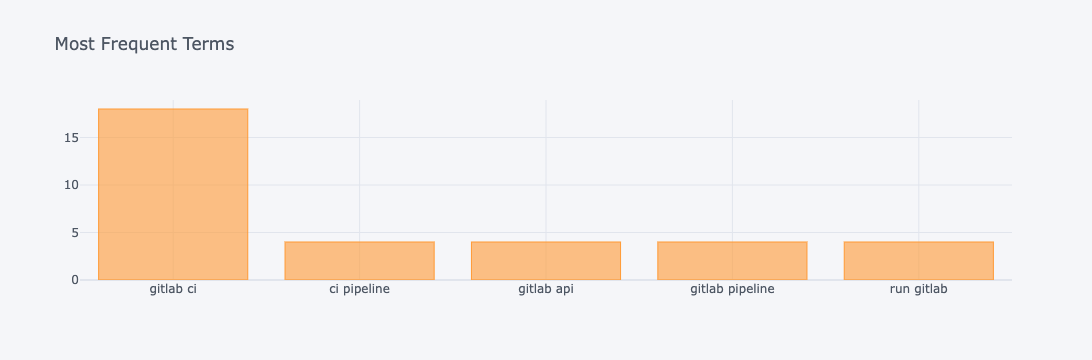

In [113]:
df_rank.head(5).iplot(kind='bar',labels='labels',values='values', title='Most Frequent Terms') 

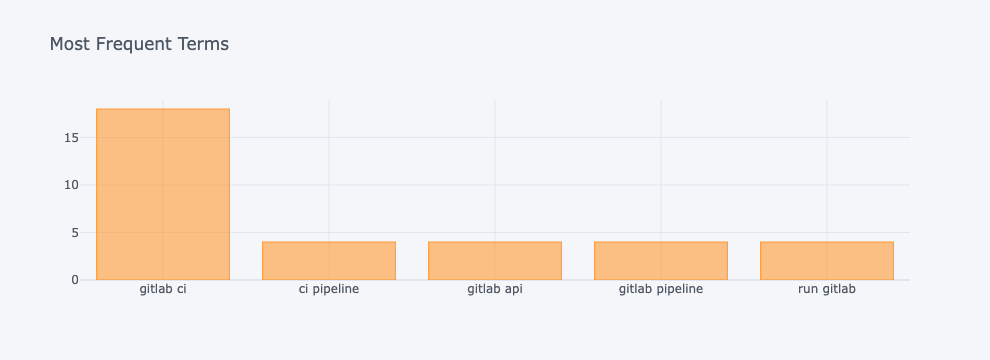

In [74]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df_plot = pd.DataFrame(df_rank.head(5))
df_plot.iplot(kind='bar',labels='labels',values='values', title='Most Frequent Terms') 

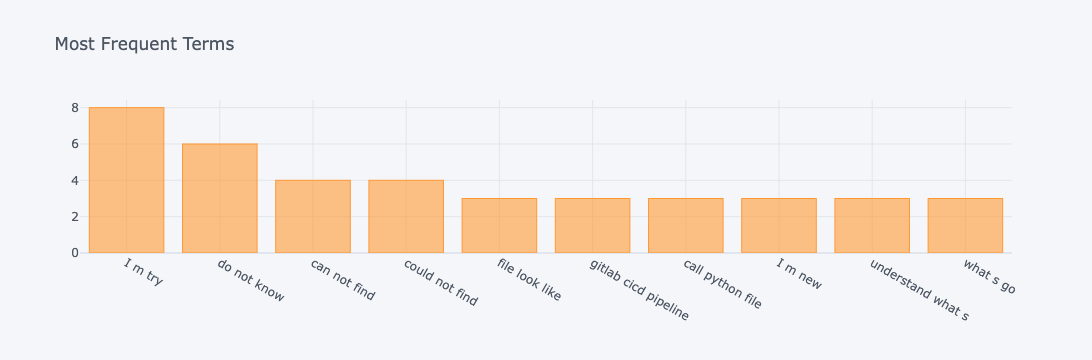

In [78]:
corpus_body = token_counter(df_qs['body_prc_trigram'])
ranked_corpus_body = rank_counts(corpus_body)
df_rank_body = pd.DataFrame.from_dict(ranked_corpus_body, orient='index', columns=['Frequency'])
df_plot_2 = pd.DataFrame(df_rank_body.head(10))
var_plot = df_plot_2.iplot(kind='bar',labels='labels',values='values', title='Most Frequent Terms')

In [80]:
type(var_plot)

NoneType

In [12]:
corpus_titles = df_qs['title_prc'].to_numpy()
corpus_titles = [word for title_list in corpus_titles for word in ast.literal_eval(title_list)]

### Explore embeddings with body of the message

In [45]:
corpus_body = df_qs['body_prc'].to_numpy()
corpus_body = [word for body_list in corpus_body for word in ast.literal_eval(body_list)]

In [46]:
body_embeddings = embeddings(corpus_body)
body_plot = body_embeddings.transform(Pca(10)).assign(is_cloud=lambda e: e.name in cloud_native)
body_plot.plot_brush(n_show=15, color="is_cloud")

alt.HConcatChart(...)

In [47]:
p2.plot_brush(n_show=15, color="is_cloud")| body_plot.plot_brush(n_show=15, color="is_cloud")

alt.HConcatChart(...)

### given the results in both charts. Sentence tokenization should be a better approach 

Next steps: 
- sentence tokenizer
- plot using the time 

In [6]:
!pip install plotly==5.6.0


     |████████████████████████████████| 27.7 MB 157 kB/s eta 0:00:01


In [7]:
!pip install cufflinks --upgrade